In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

1. Using lemonade.csv dataset and focusing on continuous variables:

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
* Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

* Use a 2 sigma decision rule to isolate the outliers.
* Do these make sense?
* Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [2]:
df = pd.read_csv('lemonade.csv')

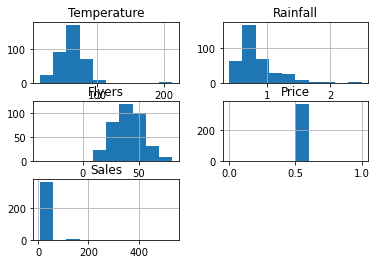

In [6]:
df.hist()

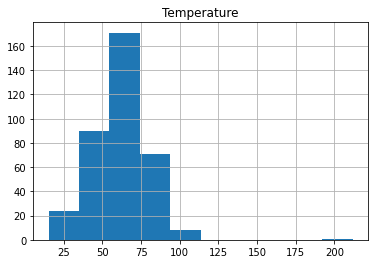

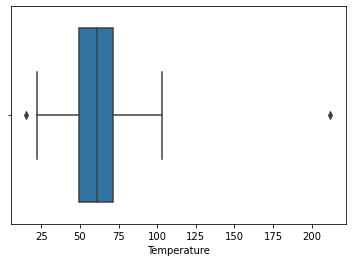

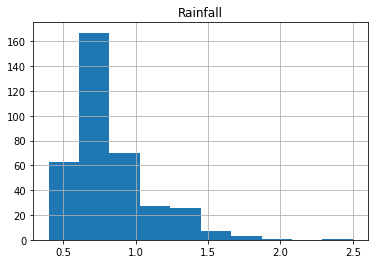

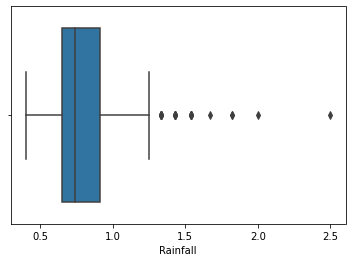

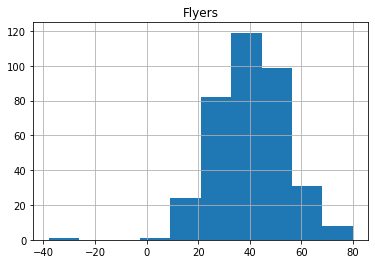

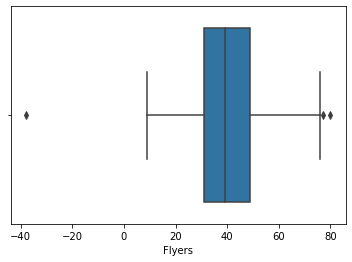

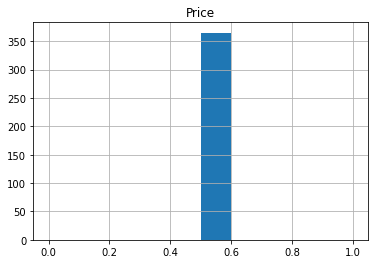

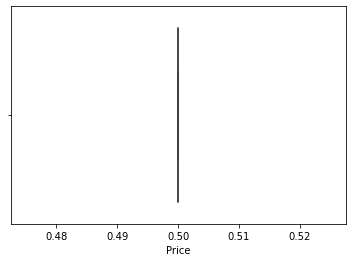

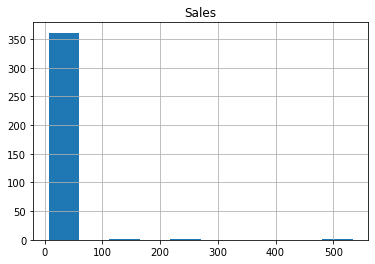

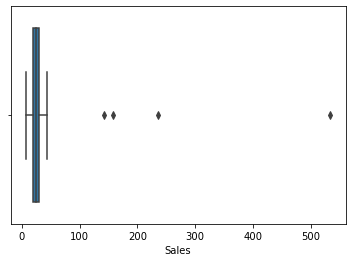

In [7]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

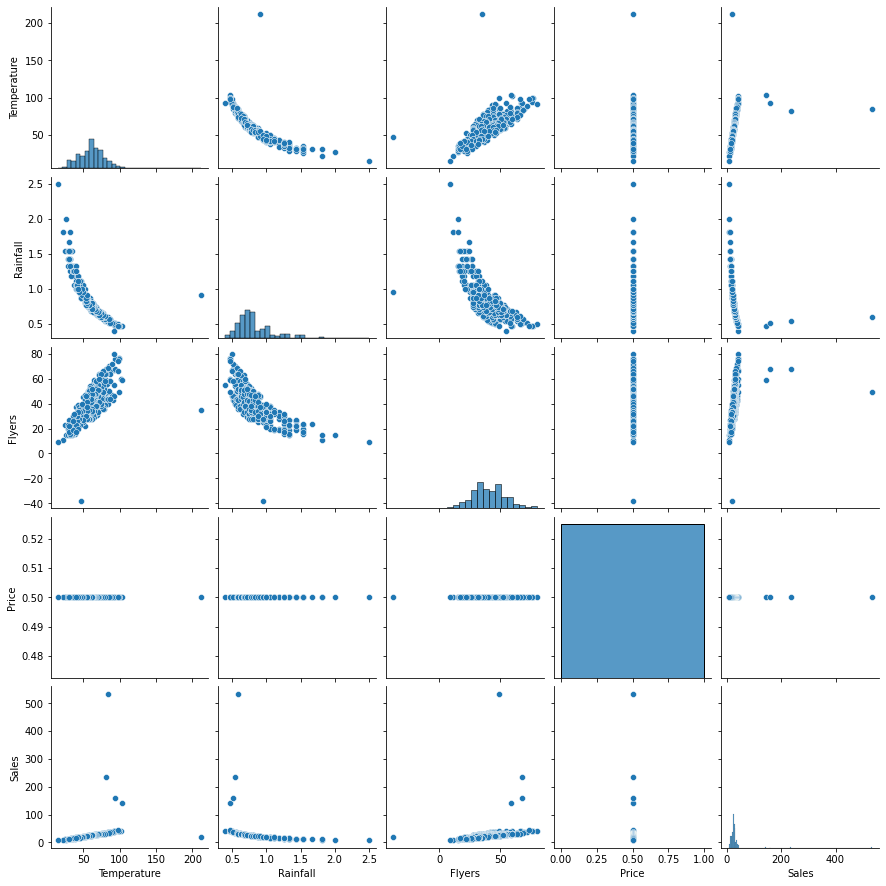

In [8]:
sns.pairplot(df)

In [9]:
def get_lower_and_upper_bounds(df, k=1.5):
    '''
    Calculates the lower and upper bound to locate outliers and prints them
    K defaults to 1.5
    '''
    for i in df.columns:
        if df[i].dtypes != 'object':
            quartile1, quartile3 = np.percentile(df[i], [25,75])
            IQR_value = quartile3 - quartile1
            lower_bound = (quartile1 - (k * IQR_value))
            upper_bound = (quartile3 + (k * IQR_value))
            print('------------------------------------------------------')
            print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
            outliers_lower = df[df[i] < lower_bound]
            outliers_upper = df[df[i] > upper_bound]
            outliers = pd.concat([outliers_lower, outliers_upper], axis=0)
            print('')
            print(outliers,'\n')
        
        
        
def visualize_get_lower_and_upper_bounds(df, k=1.5):
    '''
    Calculates the lower and upper bound to locate outliers and visualizes them
    K defaults to 1.5
    '''
    for i in df.columns:
        if df[i].dtypes != 'object':
            quartile1, quartile3 = np.percentile(df[i], [25,75])
            IQR_value = quartile3 - quartile1
            lower_bound = (quartile1 - (k * IQR_value))
            upper_bound = (quartile3 + (k * IQR_value))
            print('------------------------------------------------------------------------------')
            print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
            outliers_lower = df[df[i] < lower_bound]
            outliers_upper = df[df[i] > upper_bound]
            outliers = pd.concat([outliers_lower, outliers_upper], axis=0)
            print('')
            print(outliers,'\n')
            
            # get those visualizations going
            plt.figure(figsize=(16,4))
            plt.subplot(1, 2, 1)
            sns.histplot(data = df, x = df[i], kde=True)
            plt.title(i)
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[i], data=df, whis=k)
            plt.title(i)
            plt.show()

In [32]:
# Shoutout to the OG, what I've used for previous projects

def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Do these upper outliers make sense? Which outliers should be kept?

------------------------------------------------------------------------------
For Temperature the lower bound is 16.700000000000003 and  upper bound is 104.7

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17    Sunday         15.1      2.50       9    0.5      7
41    2/11/17  Saturday        212.0      0.91      35    0.5     21 



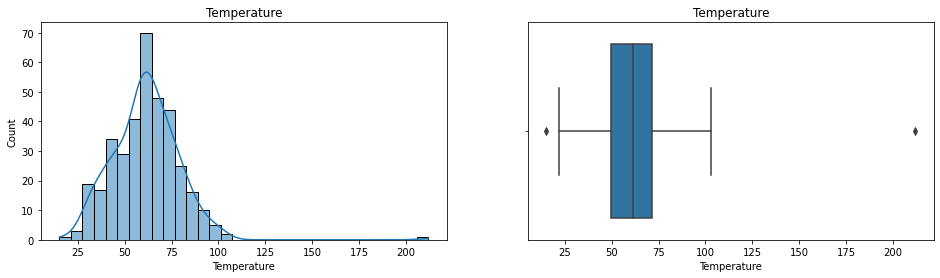

------------------------------------------------------------------------------
For Rainfall the lower bound is 0.26 and  upper bound is 1.3

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     Friday         31.6      1.43      20    0.5     12
23    1/24/17    Tu

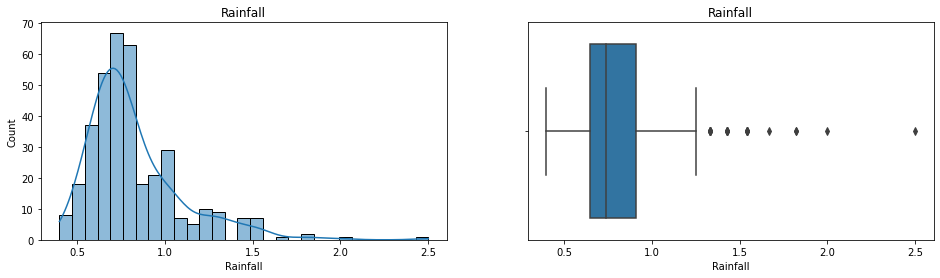

------------------------------------------------------------------------------
For Flyers the lower bound is 4.0 and  upper bound is 76.0

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
166   6/16/17   Friday         99.3      0.47      77    0.5     41
194   7/14/17   Friday         92.0      0.50      80    0.5     40 



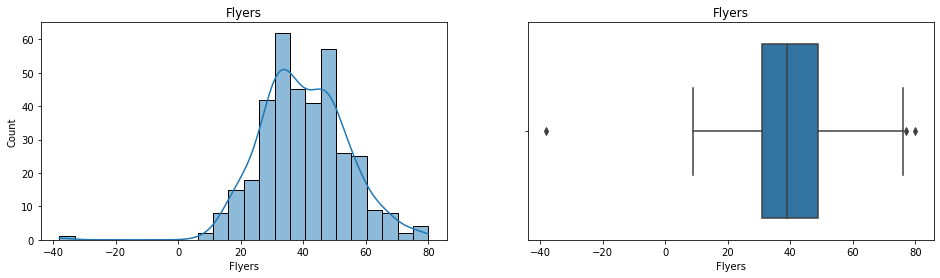

------------------------------------------------------------------------------
For Price the lower bound is 0.5 and  upper bound is 0.5

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 



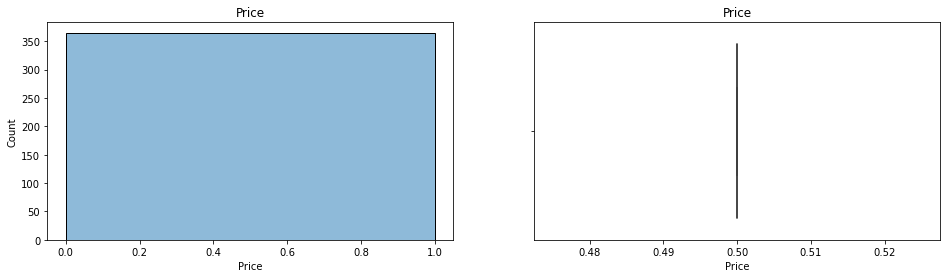

------------------------------------------------------------------------------
For Sales the lower bound is 5.0 and  upper bound is 45.0

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534 



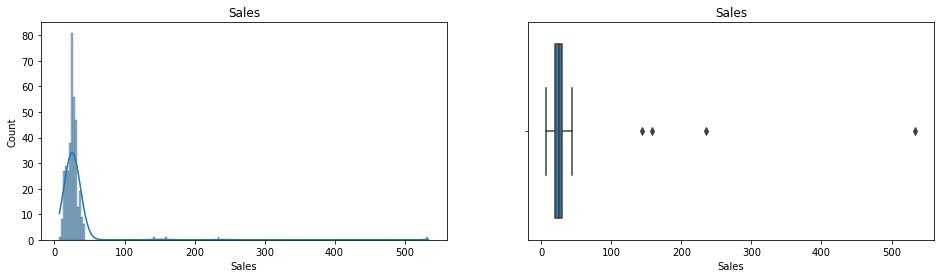

In [10]:
visualize_get_lower_and_upper_bounds(df, k=1.5)

Most of the upper and lower bounds for the lemonade dataframe are intuitively sensible and in alignment with real life expectations when observing it through the hyperparameter of k at 1.5. We can now safely assess the temperate is in Fahrenheit (we also know that the outliers beyond the upperbound should go away, because if it had been over two-hundred degrees they'd die pretty quickly); rainfall is probably in inches; flyers is a strange one, as it is absurd to imagine negative flyers (unless every flyer they put up was taken down by wind, or some angry lemonade stand competitor), but that's beyond the bound anyway and should be dropped; since the lower and upperbound is at 0.5 then we know our lemonade sellers maintained their price of a half-buck. As for sales, part of me wishes I could keep the outliers, just because those special days of selling several hundred seems like such a heart warmer, but the bounds are completely within reason. 

------------------------------------------------------------------------------
For Temperature the lower bound is -16.299999999999997 and  upper bound is 137.7

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21 



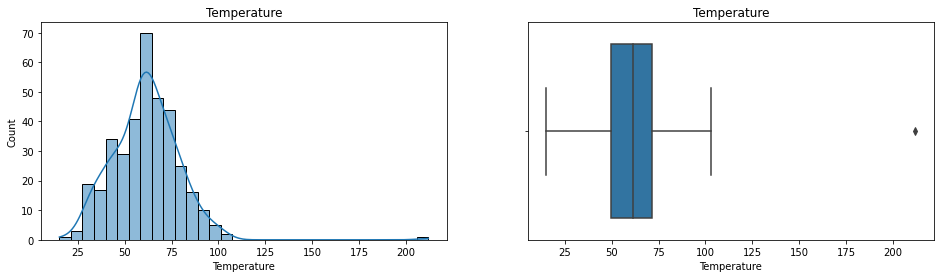

------------------------------------------------------------------------------
For Rainfall the lower bound is -0.13 and  upper bound is 1.69

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7 



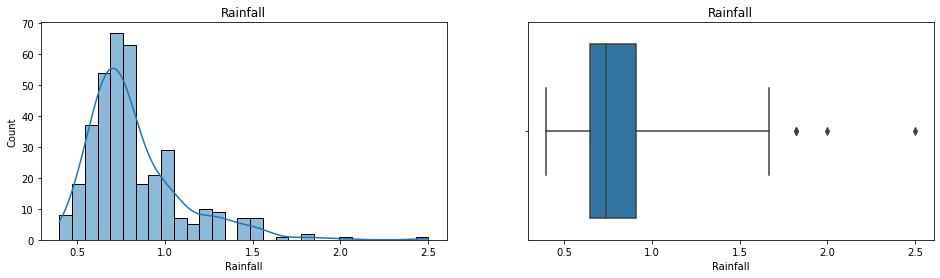

------------------------------------------------------------------------------
For Flyers the lower bound is -23.0 and  upper bound is 103.0

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20 



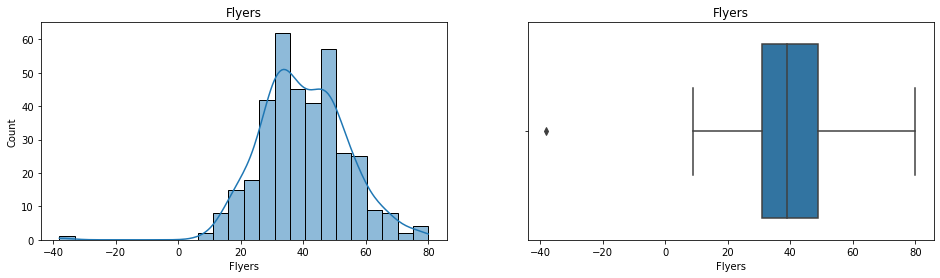

------------------------------------------------------------------------------
For Price the lower bound is 0.5 and  upper bound is 0.5

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 



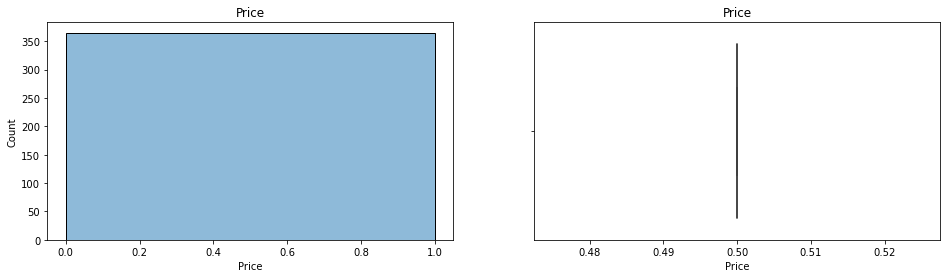

------------------------------------------------------------------------------
For Sales the lower bound is -10.0 and  upper bound is 60.0

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534 



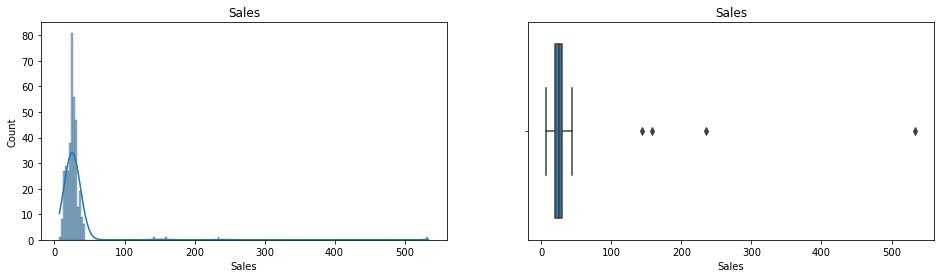

In [12]:
visualize_get_lower_and_upper_bounds(df, k=3)

In [13]:
df.Date

0        1/1/17
1        1/2/17
2        1/3/17
3        1/4/17
4        1/5/17
         ...   
360    12/27/17
361    12/28/17
362    12/29/17
363    12/30/17
364    12/31/17
Name: Date, Length: 365, dtype: object

At k=3, the picture starts to blur for some columns. Take temperature for example. The upperbound is higher than the hottest recorded temperature in Death Valley, CA; the cold temperature is sensible, but really begs the question of where this information is recorded and if it's several different lemonade salespeople, or if they're travelers (doubtful, since they're likely just kiddos with eager math-nerd parents selling their goods at a half-dollar). There are around 13 US states that could fit a range of the 1.5 k bound, but none that fit this one, although close when thinking of CA. 

Anyway, negative rainfall is a phenomenon, but if there were any truth to it's applicability here, it would change the temporal domain a bit; there's the problem, though, since this dataframe is recorded on a day-by-day basis, negative rainfall wouldn't be recorded on a single day, so it does not belong here. 

Over one hundred flyers seems extreme, and having 23 destroyed, go missing or whatever is necessary to explain away a negative flyer amount is just not worth the mental gymnastics. The same could also be noted for negative sales here, although it isn't unthinkable the sellers would drink their own lemonade on an especially hotday when no customers seem to be coming; or they're getting robbed. Still, too extreme. 

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'Flyers'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

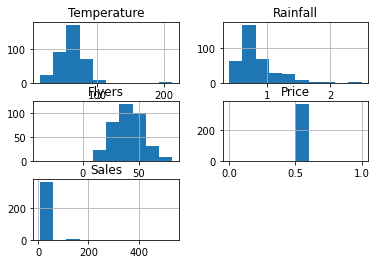

In [15]:
df.hist()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


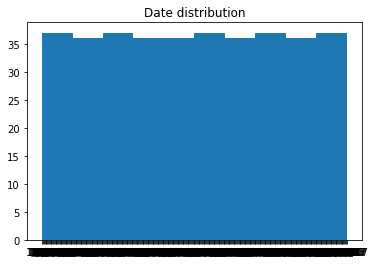

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


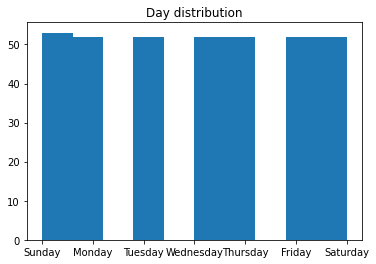

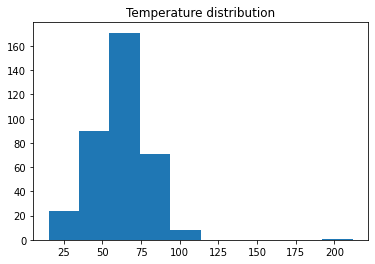

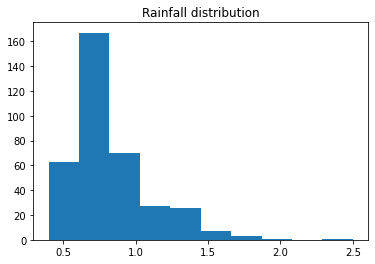

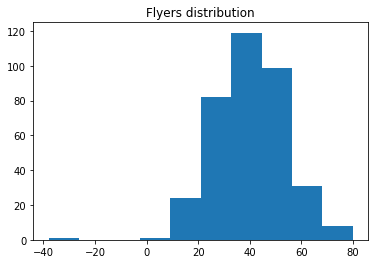

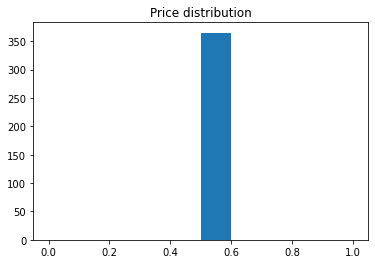

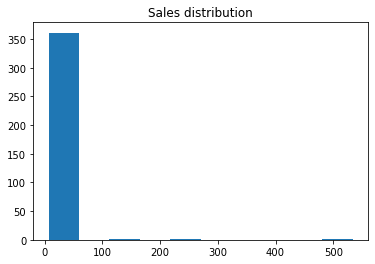

In [16]:
for col in df.columns:
        plt.hist(df[col])
        plt.title(f"{col} distribution")
        plt.show()

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

* Use a 2 sigma decision rule to isolate the outliers.
* Do these make sense?
* Should certain outliers be kept or removed?

In [33]:
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003
 Upper bound for Temperature: 104.7

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


In [34]:
# value associated with the 'df' key of the 'Temperature' subdictionary of outliers
outliers['Temperature']['df']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [35]:
# print out our outliers dataframes using list comprehension
[print('\n~~~~~~~~~~\n', key, ':\n', outliers[key]['df'].to_markdown()) for key in outliers]


~~~~~~~~~~
 Temperature :
 |     | Date     | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:---------|--------------:|-----------:|---------:|--------:|--------:|
|  41 | 2/11/17  | Saturday |         212   |       0.91 |       35 |     0.5 |      21 |
| 364 | 12/31/17 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 |

~~~~~~~~~~
 Rainfall :
 |     | Date     | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:----------|--------------:|-----------:|---------:|--------:|--------:|
|   0 | 1/1/17   | Sunday    |          27   |       2    |       15 |     0.5 |      10 |
|   1 | 1/2/17   | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 |
|   2 | 1/3/17   | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 |
|   5 | 1/6/17   | Friday    |          25.3 |       1.54 |       23 |     0.5 |      11 |
|   6 | 1/7/17   | Saturday  |          3

[None, None, None, None, None]

In [37]:
df['z_score_rainfall'] = (df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std()

In [38]:
df[df.z_score_rainfall.abs() > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_rainfall
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,4.286488
15,1/16/17,Monday,30.6,1.67,24,0.5,12,3.081626
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,3.629291
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,3.629291
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,6.112037


In [17]:
# Flyers and Temperature could reasonably be described as normally distributed. I need to look more deeply into distributions
# Because although I will consider rainfall normally distributed (Gaussian), it looks Poisson to me, too. 

# Normally distributed data
df[['Flyers', 'Temperature', 'Rainfall']].head()

,Flyers,Temperature,Rainfall
0,15,27.0,2.00
1,15,28.9,1.33
2,27,34.5,1.33
3,28,44.1,1.05
4,33,42.4,1.00


In [27]:
df[pd.Series(stats.zscore(df.Flyers)).abs()>2].sort_values(by='Flyers')
# df[pd.Series(stats.zscore(df.Flyers)).abs()>2].sort_values(by='Flyers').shape # (13, 7)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
...,...,...,...,...,...,...,...
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
166,6/16/17,Friday,99.3,0.47,77,0.5,41


__Takeaways__
* For the sake of imagination, I'm glad that there was only a single day where nearly forty flyers were stolen, taken away by wind, eaten by dogs, or misprinted so as to incur such a loss; however, this was likely just a clerical error and is an outlier worth removing. As for the upper bound, and those that exceed it, days where over 70 flyers would have been published are not out of the question; but the cost of printing those flyers would presumably outcost the profit garnered from selling lemonade. I'm not uncomfortable with removing the flyers outliers, since only 13 rows would be lost. 
But for now I'll just fix the negative value, after seeing the dates that surround it. 

In [48]:
# Locate the date with a less than 0 search 
#df[df.Flyers < 0]
# check around those dates to see the ordinary values around it
#df.loc['11/19/17':'11/23/17'] bruh... It isn't working. 
df['Flyers'] = df['Flyers'].abs()

<AxesSubplot:>

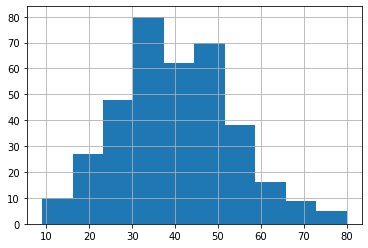

In [49]:
df.Flyers.hist()

*** 
Problem fixed
Now let's look at the sun as a deadly lazer
***

In [28]:
df[pd.Series(stats.zscore(df.Temperature)).abs()>2].sort_values(by='Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
190,7/10/17,Monday,98.0,0.49,66,0.5,40
166,6/16/17,Friday,99.3,0.47,77,0.5,41
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


__Deadly Temp__
As stated before, the 212 degree temperature was certainly recorded in error (if it wasn't, I am truly amazed that 21 people walked out to get lemonade while the steam from a near-inch of rainfall was melting their flesh). Now 98 degrees really isn't all that unusual to ME, as someone in either Lousiana or Texas in midsummer, but of course it would seem sensible that elsewhere it is not the case (all of my envy). One key downside to this, though, is that the second hottest days does have a rapid increase in sales, but since it was such a massive uptick from another day where the temperature was only .3 degrees cooler, it's more probable to have been recorded in error (despite how the former was on a Saturday, which would invite more sales).
As for the freezing temperatures, I don't mind losing them at all. If they were selling hot cocoa, then it would be a different story, and I might keep them. But lemonade on a freezing day? 

In [30]:
df[pd.Series(stats.zscore(df.Rainfall)).abs()>2].sort_values(by='Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
359,12/26/17,Tuesday,28.9,1.43,23,0.5,13
351,12/18/17,Monday,30.9,1.43,27,0.5,13
346,12/13/17,Wednesday,32.2,1.43,26,0.5,14
342,12/9/17,Saturday,31.2,1.43,19,0.5,14
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
...,...,...,...,...,...,...,...
15,1/16/17,Monday,30.6,1.67,24,0.5,12
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
0,1/1/17,Sunday,27.0,2.00,15,0.5,10


I don't have much of a stance on rainfall. But typically over an inch would mean there would several hours of moderate rain rates, which would give creedence to low sales, as is the case here. 19 rows would be lost from their exclusion; and on each of these days, the temperature is at or below freezing, and so the rainfall would be just as easily recorded as snowfall, which would more easily reach these higher accumulations. Given that these are in deep winter, I see no reason to let them go, but their loss wouldn't matter so much. I'm keeping them. 

In [31]:
def sigma_outliers(df, sigma=2):

    for i in df.columns:
        
        if df[i].dtypes != 'object':

            print(df[pd.Series(stats.zscore(df[i])).abs()>sigma].sort_values(by=i))
            print('----------------------------------------')